In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility.graphing_tools import single_dim_comparison, generate_latex_table_from_csvs, method_name_coverter, heavy_t_comparison
from utility.exps import run_synthetic_experiment, heavy_t

In [2]:
method_list = ["Point_CHR", "Unscaled", "Bonferroni", "Empirical_copula", "TSCP_R", "TSCP_GWC", "TSCP_S"]
method_name_list = method_name_coverter(method_list=method_list)

method_list_body = ["Point_CHR", "Unscaled", "Bonferroni", "Empirical_copula", "TSCP_R", "TSCP_S"]
method_name_list_body = method_name_coverter(method_list_body)

method_list_ours = ["TSCP_R", "TSCP_GWC", "TSCP_LWC", "TSCP_S", "Population_oracle"]
method_name_list_ours = method_name_coverter(method_list_ours)

method_list_full = ["TSCP_R", "TSCP_GWC", "TSCP_LWC", "TSCP_S", "Population_oracle", "Point_CHR", "Unscaled", "Bonferroni", "Empirical_copula"]
method_name_list_full = method_name_coverter(method_list_full)

method_list_inexp = ["TSCP_R", "TSCP_GWC", "TSCP_S", "Population_oracle", "Point_CHR", "Unscaled", "Bonferroni", "Empirical_copula"]
method_name_list_inexp = method_name_coverter(method_list_inexp)

# Testing Coverage on Six Distributions

We test all methods discussed in the experiment section of our paper on four different distributions: Gaussian, Gaussian with unit noise, Laplace, Gamma, Mixed, Cauchy.
We report test coverage, volume, and runtime with their one standard deviation. 

In [7]:
dim_list = [2, 10]
sample_list = [30, 50, 100, 300, 500]
alpha_list = [0.1]
trial = 200
noise_list_unit = [np.repeat(1, 2), np.repeat(1, 10)]
noise_type_list = ["Gaussian", "Unit_Gaussian", "Laplace", "Gamma", "Mixed", "Cauchy"]

## Experiements

In [ ]:
for noise_type in noise_type_list:

    if noise_type == "Unit_Gaussian":
        for method in method_list_inexp:
            results = run_synthetic_experiment(dim_list=dim_list, sample_list=sample_list, alpha_list=alpha_list, noise_type="Gaussian", trials=200, noises_list=noise_list_unit, method=method)
            results.to_csv("syn_exps/gaussian/"+method.lower()+"_"+noise_type.lower()+".csv")
    else:
        for method in method_list_inexp:
            results = run_synthetic_experiment(dim_list=dim_list, sample_list=sample_list, alpha_list=alpha_list, noise_type=noise_type, trials=200, method=method)
            results.to_csv("syn_exps/"+noise_type.lower()+"/"+method.lower()+"_"+noise_type.lower()+".csv")

## Graphs

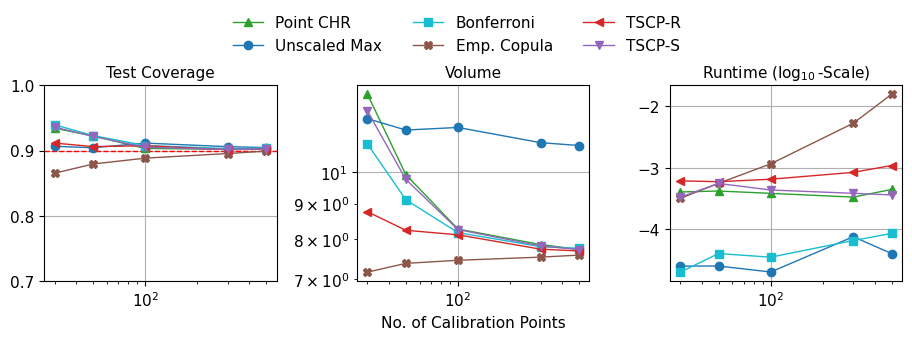

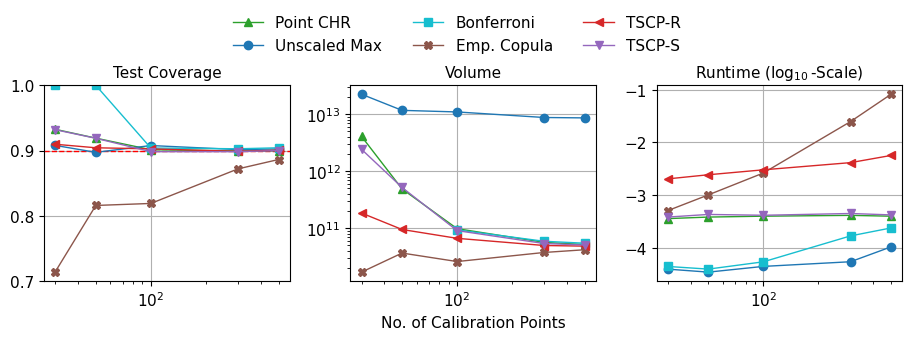

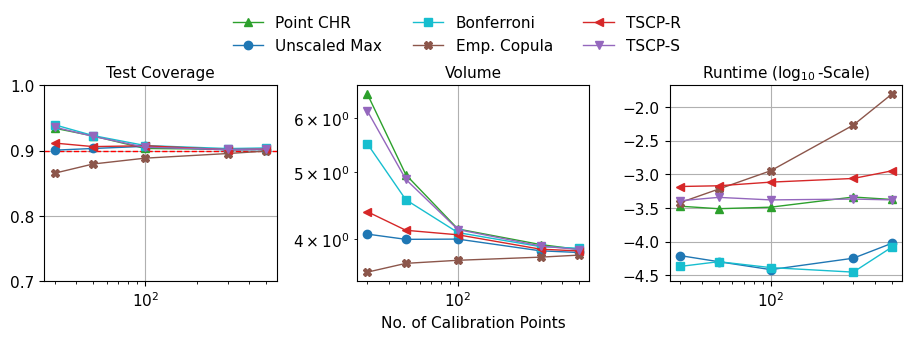

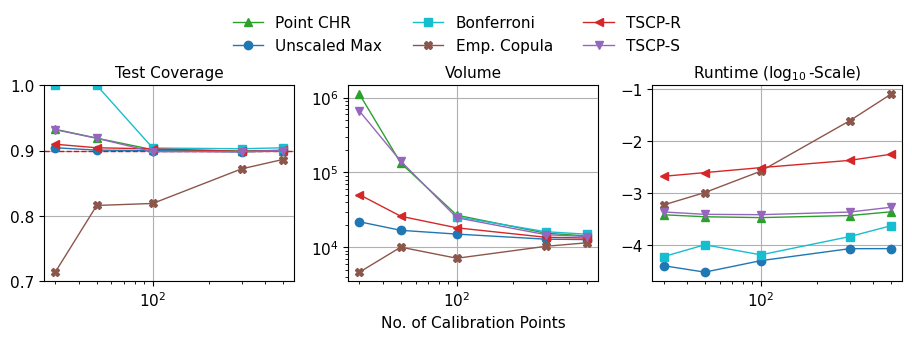

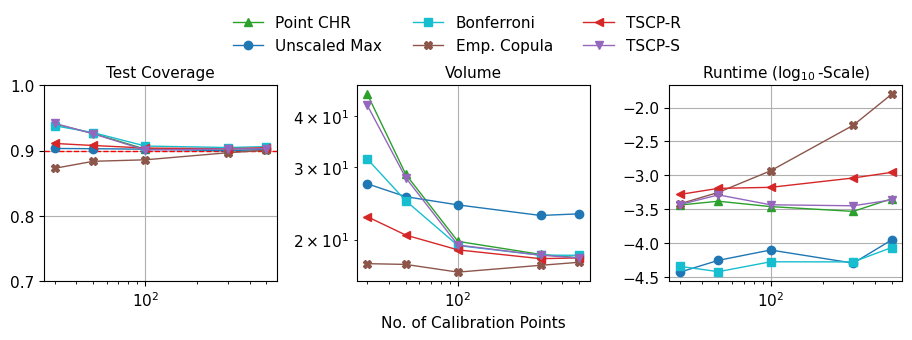

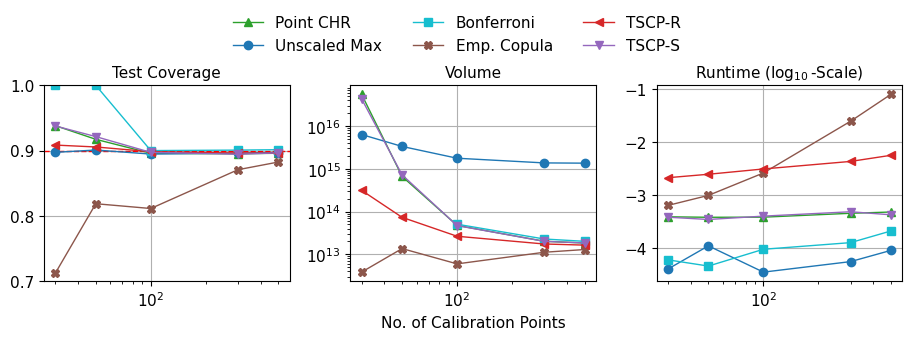

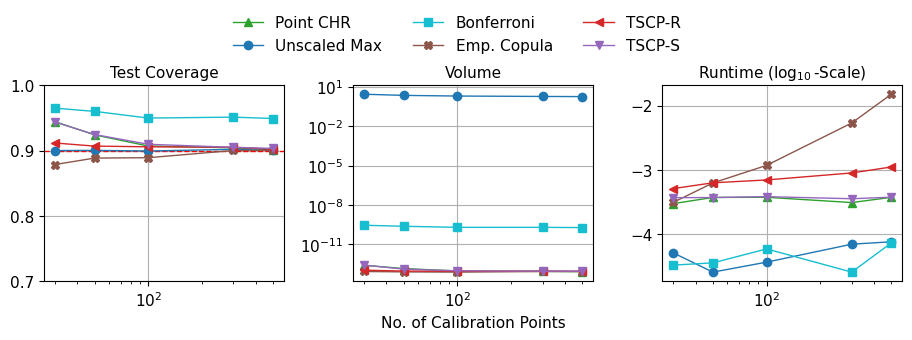

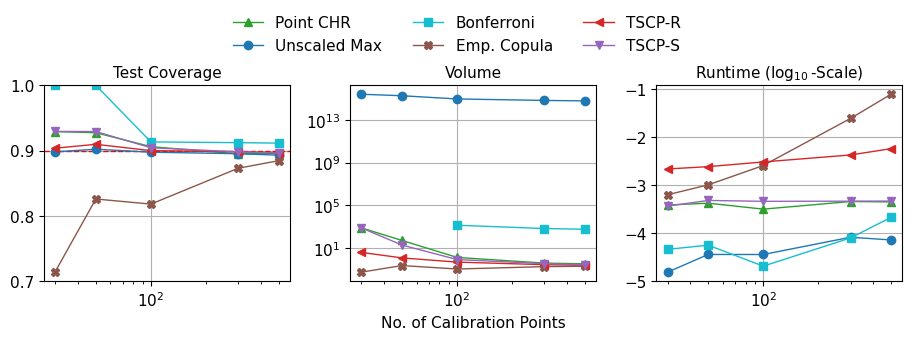

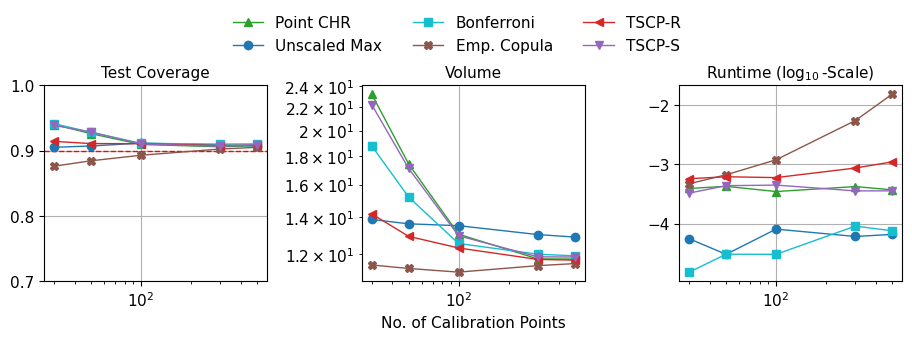

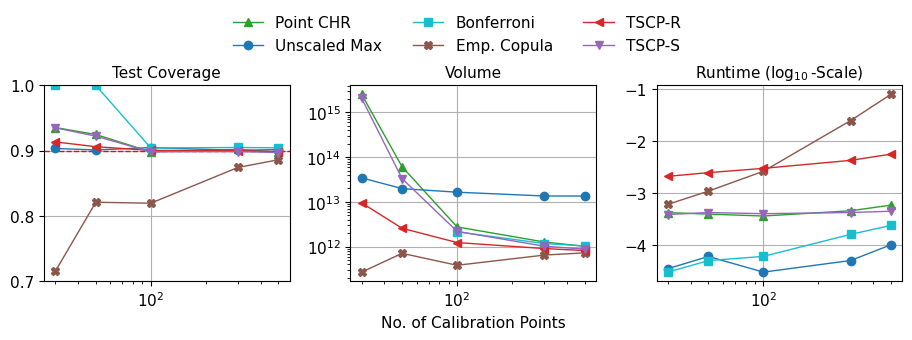

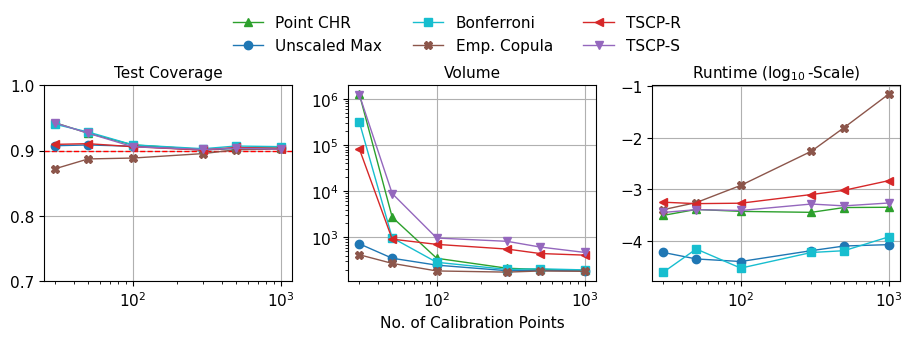

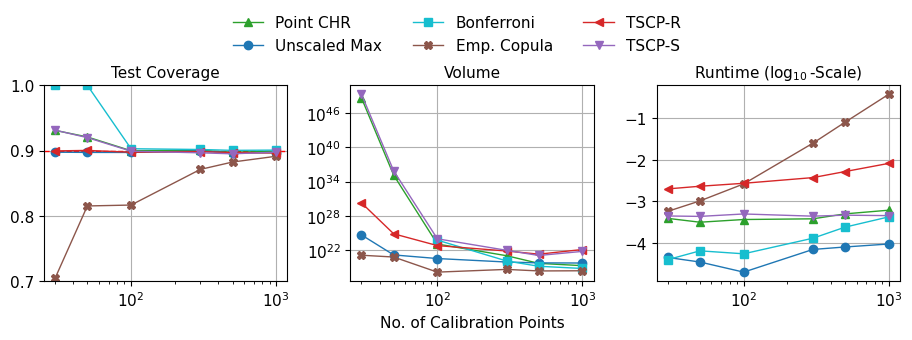

In [16]:
for noise_type in noise_type_list:

    folder_name = "gaussian" if noise_type == "Unit_Gaussian" else noise_type.lower()
    dict = {}
    for method in method_list_body:
        results = pd.read_csv("syn_exps/"+folder_name+"/"+method.lower()+"_"+noise_type.lower()+".csv")
        dict[method_name_list_body[method]] = results
    for dim in dim_list:
        fig, axes = single_dim_comparison(df_dict=dict, dim=dim, n_cols = 3, error_bar=False, bbox_to_anchor=(0.43, 1.15), loc="upper center")
        fig.savefig(f"syn_exps/figures/{folder_name}/"+noise_type.lower()+"_"+f"{dim}"+"d.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict, dim, noise_type, filename=f"syn_exps/figures/{folder_name}/{noise_type.lower()}_{dim}d.tex")



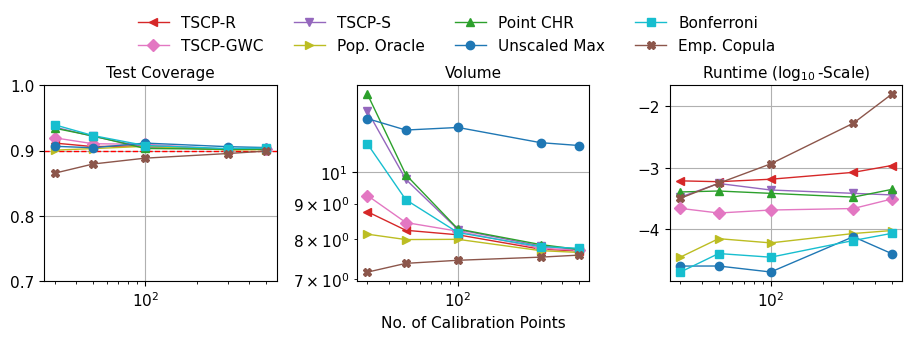

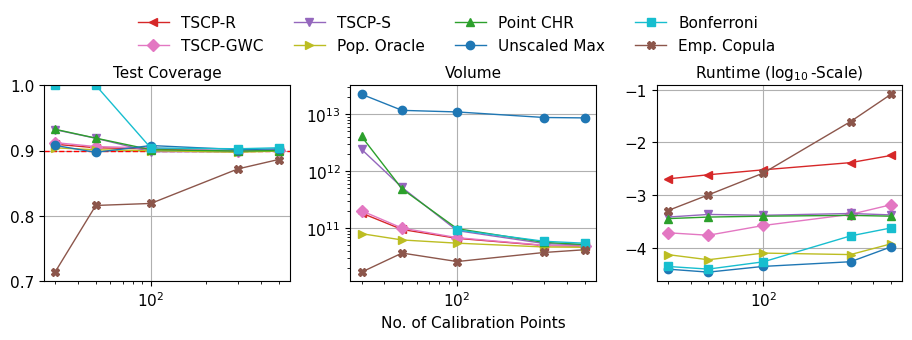

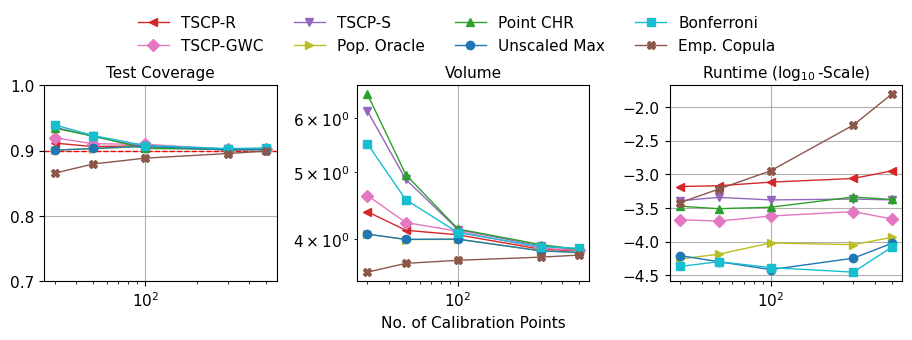

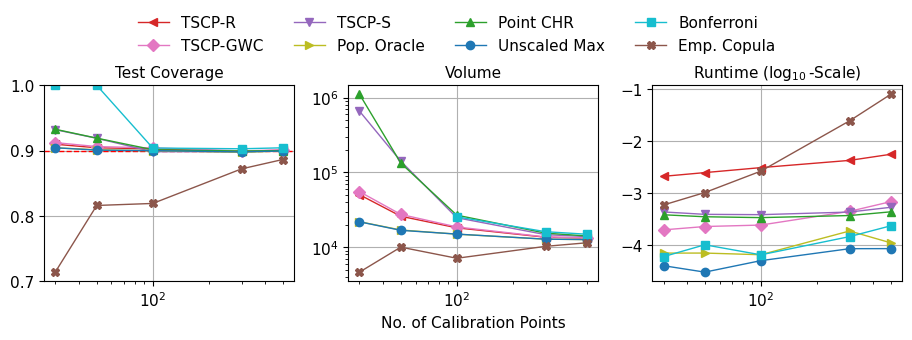

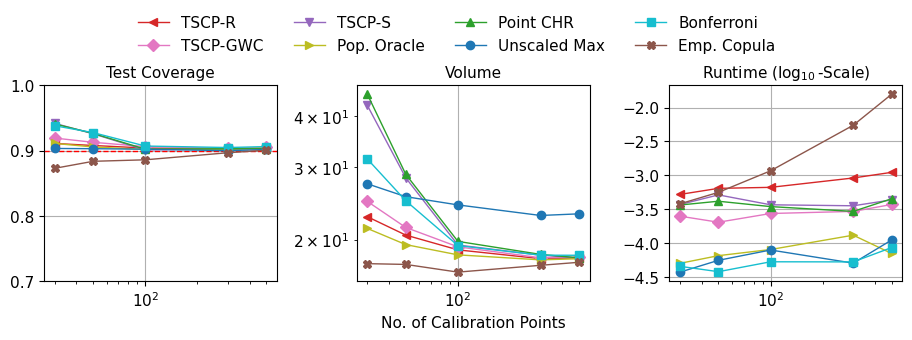

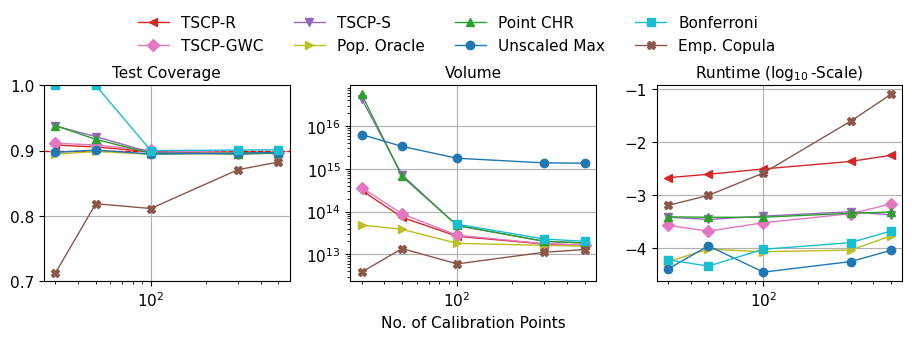

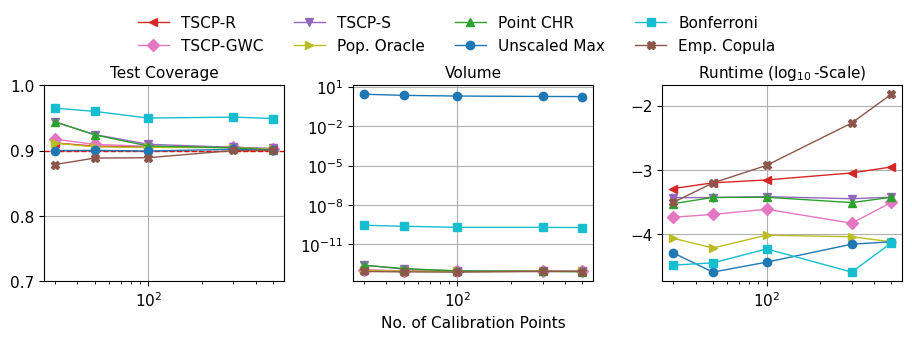

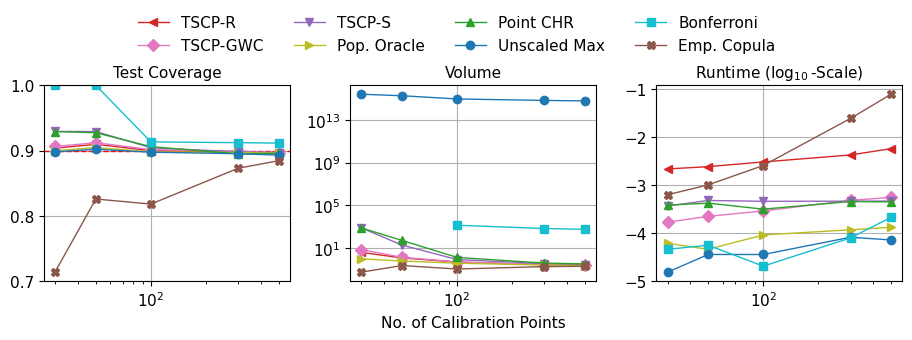

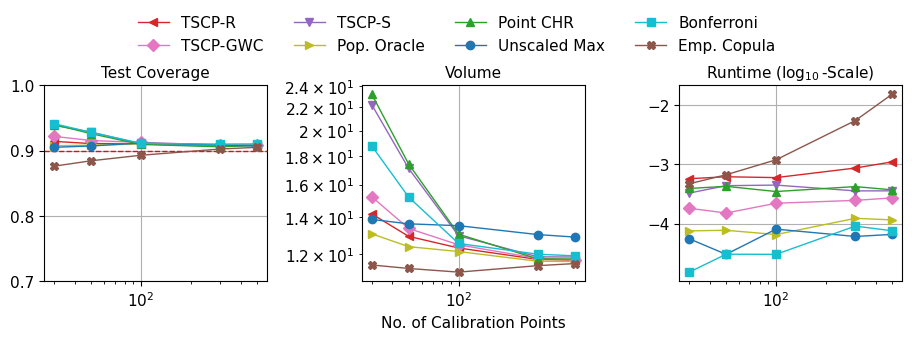

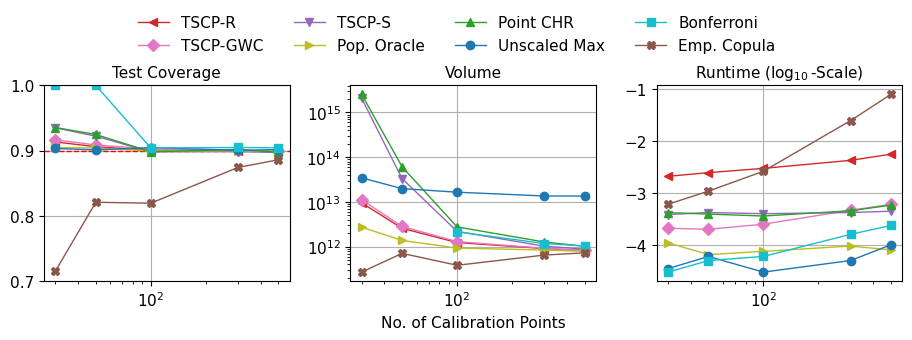

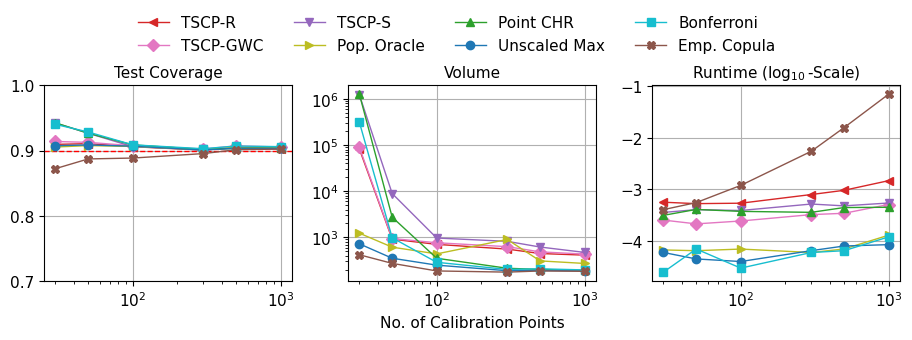

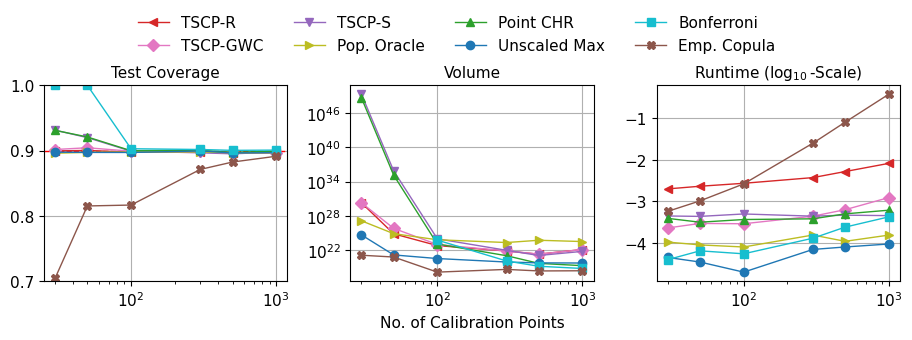

In [17]:
for noise_type in noise_type_list:

    folder_name = "gaussian" if noise_type == "Unit_Gaussian" else noise_type.lower()
    dict = {}
    for method in method_list_inexp:
        results = pd.read_csv("syn_exps/"+folder_name+"/"+method.lower()+"_"+noise_type.lower()+".csv")
        dict[method_name_list_inexp[method]] = results
    for dim in dim_list:
        fig, axes = single_dim_comparison(df_dict=dict, dim=dim, n_cols = 4, error_bar=False, bbox_to_anchor=(0.43, 1.15), loc="upper center")
        fig.savefig(f"syn_exps/figures/{folder_name}/"+noise_type.lower()+"_"+f"{dim}"+"d_inexp.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict, dim, noise_type, filename=f"syn_exps/figures/{folder_name}/{noise_type.lower()}_{dim}d_inexp.tex")

# Testing Our Method on t-distribution

We test our method on the student t distribution with fixed dim and fixed sample but various degree of freedome to see how robust our method is with heavy tailed error.

In [18]:
dim_list_t = [2, 10]
df_list = [1.5, 2, 3, 10, 30, 100]
sample_list_t = [30, 500]

## Experiments

In [4]:
for method in method_list_inexp:
    results = heavy_t(dim_list=dim_list_t, sample_list=sample_list_t, alpha_list=[0.1], df_list=df_list, trials=200, method=method)
    results.to_csv("syn_exps/t/"+method.lower()+"_t.csv")

d:\anaconda\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
d:\anaconda\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
d:\anaconda\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
d:\anaconda\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
d:\anaconda\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
d:\anaconda\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Graphs

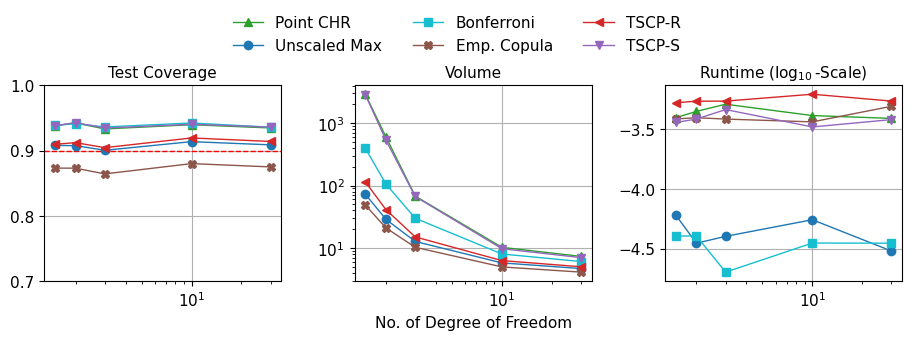

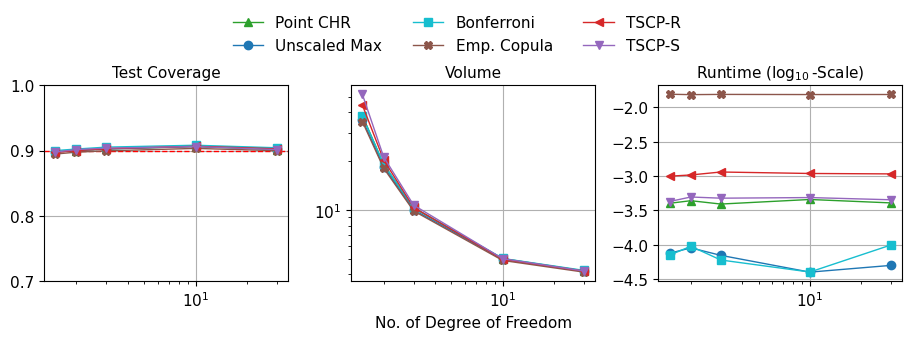

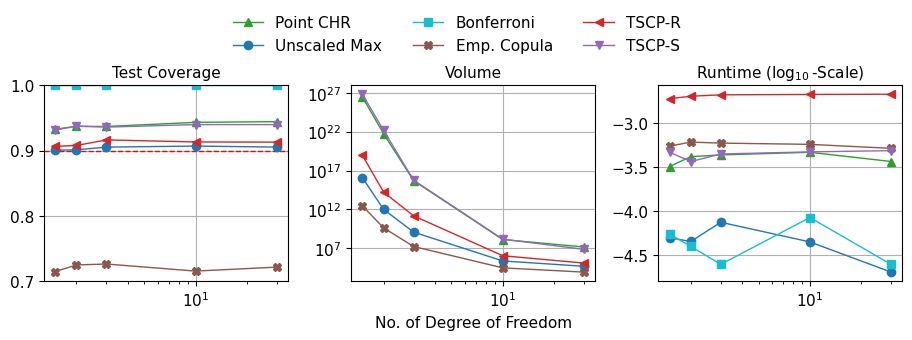

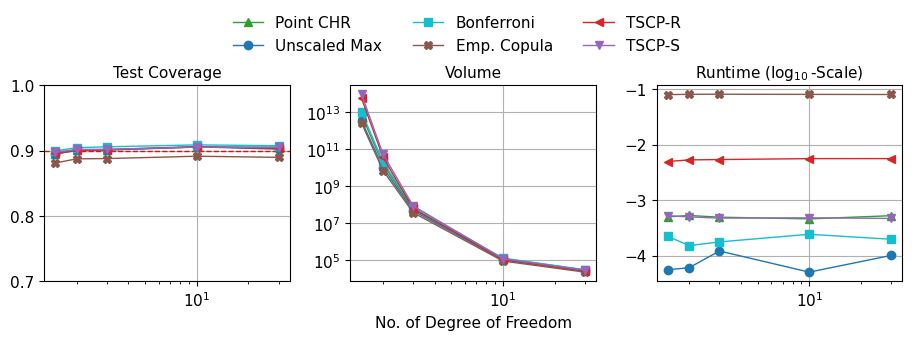

In [19]:
dict_t = {}
for method in method_list_body:
    results = pd.read_csv("syn_exps/t/"+method.lower()+"_t.csv")
    dict_t[method_name_list_body[method]] = results

for dim in dim_list_t:
    for sample in sample_list_t:
        fig, axes = heavy_t_comparison(df_dict=dict_t, dim=dim, sample = sample, n_cols = 3, error_bar=False, bbox_to_anchor=(0.43, 1.15), loc="upper center")
        fig.savefig(f"syn_exps/figures/t/t_n{sample}_{dim}d.pdf", bbox_inches='tight')
        generate_latex_table_from_csvs(dict_t, dim, "Student-t", filename=f"syn_exps/figures/t/t_n{sample}_{dim}d.tex")

# Comparison of Our Methods on 2D-Laplace

We compare all four variants of our method, including the population oracle on 2D Laplace noise. We only do it for 2D because the TSCP-LWC method is almost impossible to finish with large dimensions, but the message overall should be clear.

In [12]:
dict_ours = {}
for method in method_list_ours:
    results = pd.read_csv("syn_exps/laplace/"+method.lower()+"_laplace.csv")
    dict_ours[method_name_list_ours[method]] = results

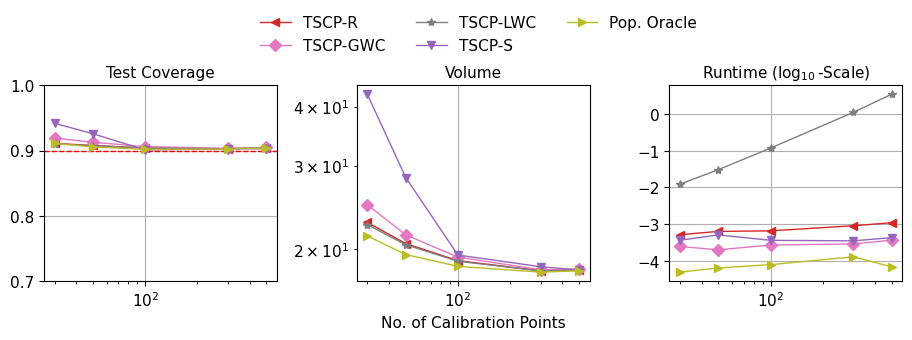

In [13]:
fig, axes = single_dim_comparison(df_dict=dict_ours, dim=2, n_cols = 3, error_bar=False, bbox_to_anchor=(0.45, 1.15), loc="upper center")
fig.savefig("syn_exps/figures/laplace/ours_2d.pdf", bbox_inches='tight')

In [14]:
generate_latex_table_from_csvs(dict_ours, dim = 2, noise_type = "Laplace", filename="syn_exps/figures/laplace/comparisons_ours.tex")